<a href="https://colab.research.google.com/github/ankit-rathi/Tradevesting_v1/blob/main/Rough_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
from datetime import datetime
from scipy.optimize import newton

def calculate_xirr(dates, cash_flows):
    def xnpv(rate):
        return sum(cf / ((1 + rate) ** ((date - dates[0]).days / 365)) for date, cf in zip(dates, cash_flows))
    return newton(xnpv, 0.1)

# Load data
df = pd.read_csv('https://raw.githubusercontent.com/ankit-rathi/Tradevesting_v1/main/data/myInvestments.csv')
df['Date'] = pd.to_datetime(df['Date'], format="%d-%b-%y")

# Extract inputs
dates = list(df['Date'])
cash_flows = list(df['Investment'])

# Define corpus
today = pd.to_datetime('30-Jul-2025', format="%d-%b-%Y") #pd.to_datetime(datetime.today().date())
corpus_value = 15000000  # Replace with actual

# Append current corpus
dates_with_corpus = dates + [today]
cash_flows_with_corpus = cash_flows + [corpus_value]

# XIRR calculation
xirr_with_corpus = calculate_xirr(dates_with_corpus, cash_flows_with_corpus)

# Absolute return
total_investment = -sum([cf for cf in cash_flows])
absolute_return = corpus_value - total_investment
absolute_return_pct = (absolute_return / total_investment) * 100

# Results
print(f"📊 Total Investment ₹{total_investment}")
print(f"📊 XIRR with current corpus ₹{corpus_value} ({xirr_with_corpus * 100:.2f}%)")
print(f"📈 Absolute Return: ₹{absolute_return} ({absolute_return_pct:.2f}%)")

📊 Total Investment ₹11654190
📊 XIRR with current corpus ₹15000000 (16.72%)
📈 Absolute Return: ₹3345810 (28.71%)


In [11]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=32b15946fa543446bfe59e1cd6fefbb29626618a2c50084a1321e185527ea761
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


[*********************100%***********************]  8 of 8 completed


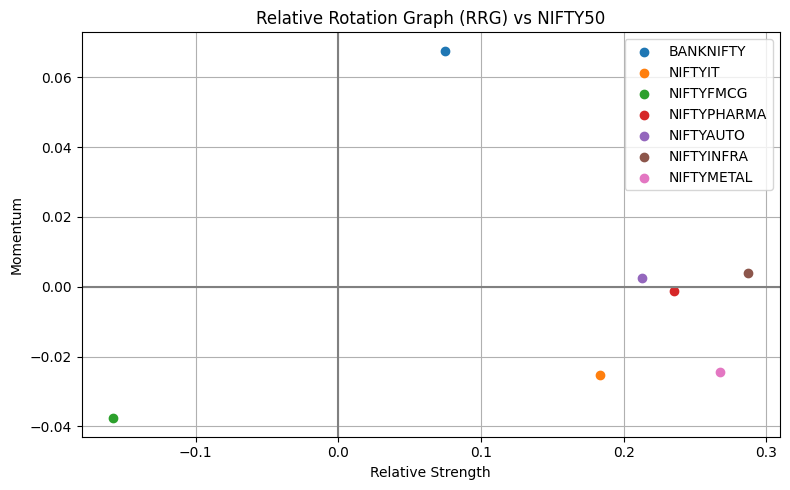

In [16]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Define tickers
tickers = {
    "NIFTY50": "^NSEI",
    "BANKNIFTY": "^NSEBANK",
    "NIFTYIT": "^CNXIT",
    "NIFTYFMCG": "^CNXFMCG",
    "NIFTYPHARMA": "^CNXPHARMA",
    "NIFTYAUTO": "^CNXAUTO",
    "NIFTYINFRA": "^CNXINFRA",
    "NIFTYMETAL": "^CNXMETAL"
}

# Download data
data = yf.download(list(tickers.values()), start="2024-01-01", end="2025-06-27")['Close']
data.columns = tickers.keys()

# Daily returns
returns = data.pct_change().dropna()

# Relative returns to NIFTY50
relative_returns = returns.div(returns["NIFTY50"], axis=0)

# Rolling mean and momentum
relative_strength = relative_returns.rolling(window=14).mean()
momentum = relative_strength.diff()

# Normalize
scaler = StandardScaler()
rs_scaled = scaler.fit_transform(relative_strength.drop(columns="NIFTY50").dropna())
mo_scaled = scaler.fit_transform(momentum.drop(columns="NIFTY50").dropna())

# Latest values
x = rs_scaled[-1]
y = mo_scaled[-1]
labels = relative_strength.columns.drop("NIFTY50")

# Plot RRG
plt.figure(figsize=(8, 5))
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')

for i, label in enumerate(labels):
    plt.scatter(x[i], y[i], label=label)
    #plt.text(x[i] + 0.02, y[i] + 0.02, label, fontsize=12)

plt.title("Relative Rotation Graph (RRG) vs NIFTY50")
plt.xlabel("Relative Strength")
plt.ylabel("Momentum")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


[*********************100%***********************]  11 of 11 completed


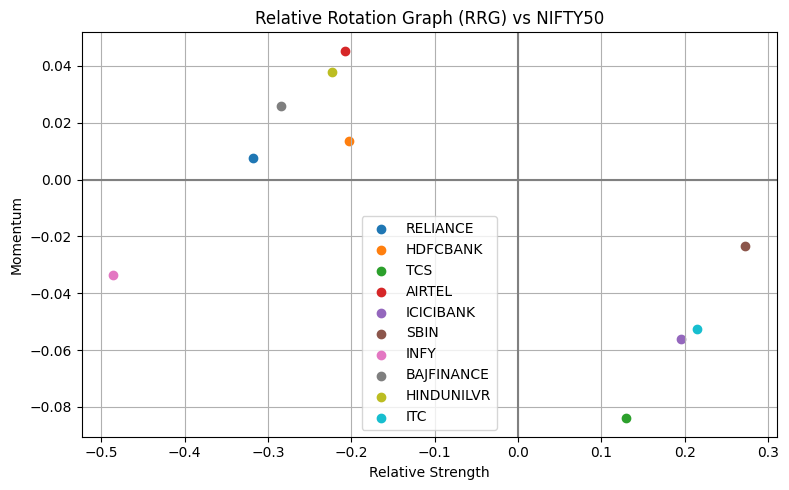

In [67]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

index = 'NIFTY50'

# Define tickers
tickers = {
    "NIFTY50": "^CNXIT",
    "RELIANCE": "RELIANCE.NS",
    "HDFCBANK": "HDFCBANK.NS",
    "TCS": "TCS.NS",
    "AIRTEL": "BHARTIARTL.NS",
    "ICICIBANK": "ICICIBANK.NS",
    "SBIN": "SBIN.NS",
    "INFY": "INFY.NS",
    "BAJFINANCE": "BAJFINANCE.NS",
    "HINDUNILVR": "HINDUNILVR.NS",
    "ITC": "ITC.NS"
}

# Download data
data = yf.download(list(tickers.values()), start="2024-01-01", end="2025-06-28")['Close']
data.columns = tickers.keys()

# Daily returns
returns = data.pct_change().dropna()

# Relative returns to NIFTY50
relative_returns = returns.div(returns[index], axis=0)

# Rolling mean and momentum
relative_strength = relative_returns.rolling(window=14).mean()
momentum = relative_strength.diff()

# Normalize
scaler = StandardScaler()
rs_scaled = scaler.fit_transform(relative_strength.drop(columns=index).dropna())
mo_scaled = scaler.fit_transform(momentum.drop(columns=index).dropna())

# Latest values
x = rs_scaled[-1]
y = mo_scaled[-1]
labels = relative_strength.columns.drop(index)

# Plot RRG
plt.figure(figsize=(8, 5))
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')

for i, label in enumerate(labels):
    plt.scatter(x[i], y[i], label=label)
    #plt.text(x[i] + 0.02, y[i] + 0.02, label, fontsize=12)

plt.title("Relative Rotation Graph (RRG) vs "+ index)
plt.xlabel("Relative Strength")
plt.ylabel("Momentum")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


['TATAMOTORS', 'M&M', 'MARUTI', 'BAJAJ-AUTO', 'HEROMOTOCO', 'TVSMOTOR']


[*********************100%***********************]  7 of 7 completed


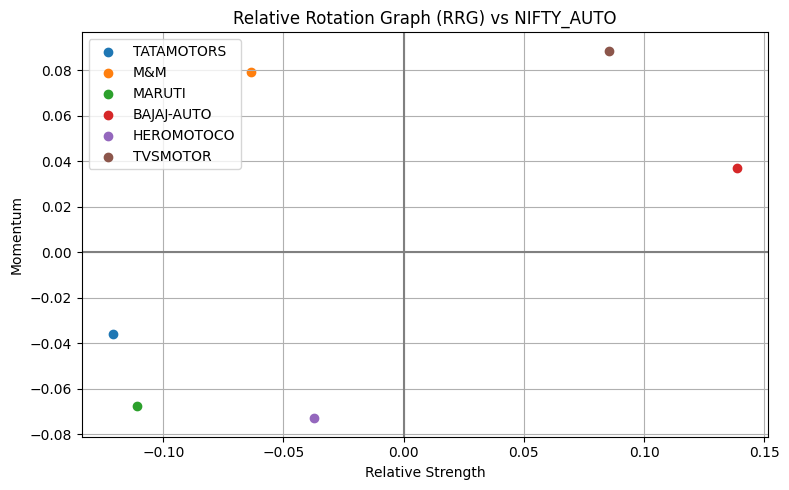

In [63]:
# function to fetch my prospects csv
def get_mysector_df():
  mysector_df = pd.read_csv('https://raw.githubusercontent.com/ankit-rathi/Tradevesting_v1/main/data/NSE_Sectors_Indices.csv')
  return mysector_df

sector_key_item = 'AUTO'
sector_value_item = '^CNXAUTO'

df = get_mysector_df()
stock_key_list = df[df['Sector'] == sector_key_item]['Symbol']
stock_key_list = list(stock_key_list)
suffix = ".NS"
stock_value_list = list(stock_key_list)

# 1. Suffix each item except the first
for i in range(0, len(stock_value_list)):
    stock_value_list[i] = stock_value_list[i] + suffix

print(stock_key_list)
# 2. Add the new item to the list
stock_key_list.append(sector_key_item)
stock_value_list.append(sector_value_item)

# Download data
data = yf.download(list(stock_value_list), start="2024-01-01", end="2025-06-28")['Close']
data.columns = stock_key_list

# Daily returns
returns = data.pct_change().dropna()

# Relative returns to NIFTY50
relative_returns = returns.div(returns[sector_key_item], axis=0)

# Rolling mean and momentum
relative_strength = relative_returns.rolling(window=14).mean()
momentum = relative_strength.diff()

# Normalize
scaler = StandardScaler()
rs_scaled = scaler.fit_transform(relative_strength.drop(columns=sector_key_item).dropna())
mo_scaled = scaler.fit_transform(momentum.drop(columns=sector_key_item).dropna())

# Latest values
x = rs_scaled[-1]
y = mo_scaled[-1]
labels = relative_strength.columns.drop(sector_key_item)

# Plot RRG
plt.figure(figsize=(8, 5))
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')

for i, label in enumerate(labels):
    plt.scatter(x[i], y[i], label=label)
    #plt.text(x[i] + 0.02, y[i] + 0.02, label, fontsize=12)

plt.title("Relative Rotation Graph (RRG) vs NIFTY_" + sector_key_item)
plt.xlabel("Relative Strength")
plt.ylabel("Momentum")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
